### EDA - Missing Values 

In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

breast_cancer = pd.read_csv("data.csv")
#breast_cancer.head(5)


#Introduce missing values intentionally
breast_cancer_missing = breast_cancer.copy()
breast_cancer_missing.drop(columns=['Unnamed: 32'], axis=1)

breast_cancer_missing.loc[::10, 'area_mean'] = None  # Introduce missing values in the 'area_mean' column
breast_cancer_missing.loc[::15, 'radius_mean'] = None  # Introduce missing values in the 'radius_mean' column

In [54]:
breast_cancer_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              531 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                512 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [58]:
breast_cancer_missing=breast_cancer_missing.drop(columns=['Unnamed: 32'])

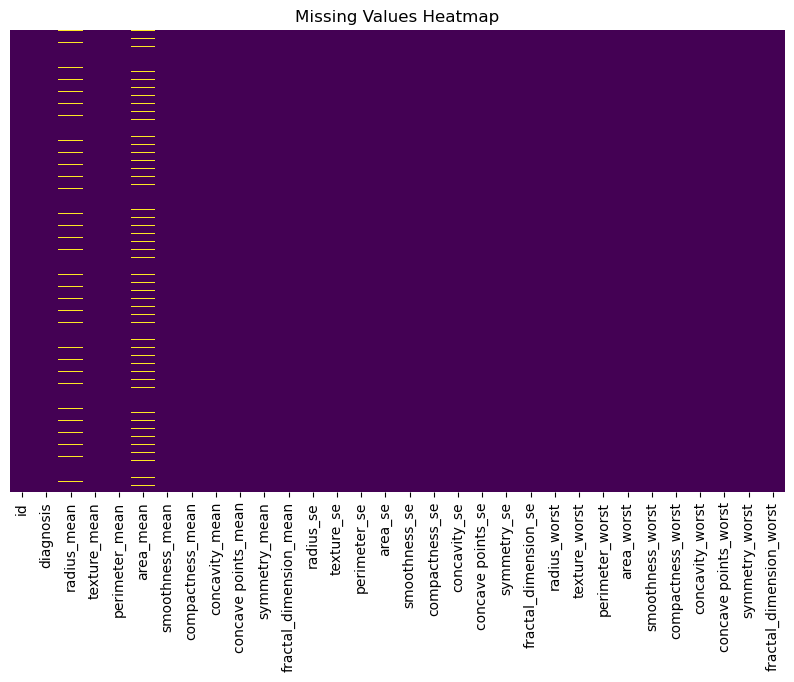

In [64]:
# Visualize missing values using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(breast_cancer_missing.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

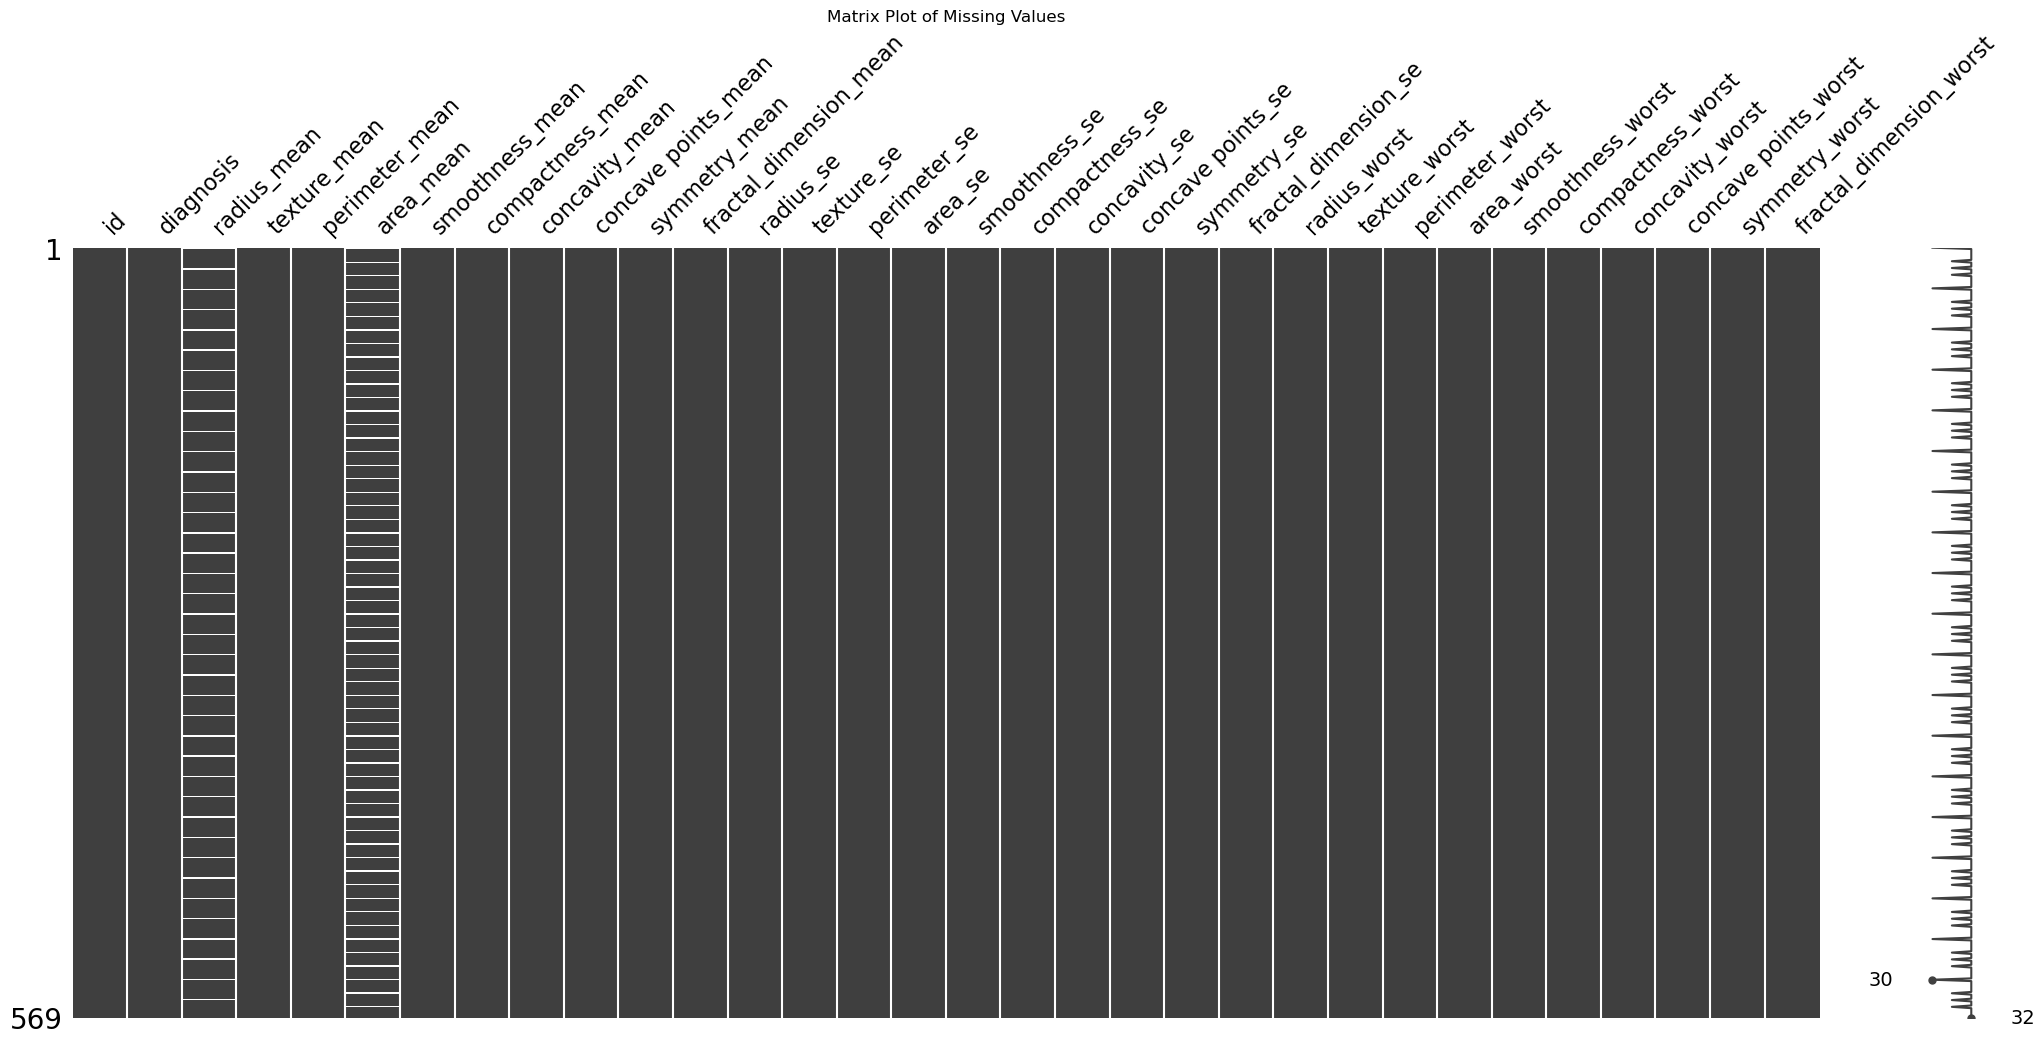

In [62]:
import missingno as msno

# Visualizing missing values using matrix plot
msno.matrix(breast_cancer_missing)
plt.title('Matrix Plot of Missing Values')
plt.show()


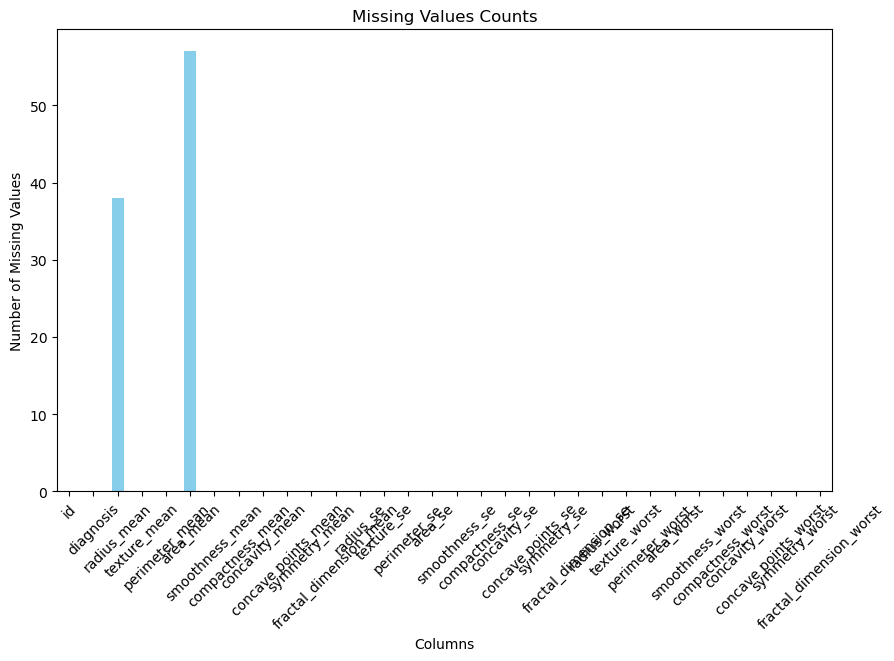

id                          0
diagnosis                   0
radius_mean                38
texture_mean                0
perimeter_mean              0
area_mean                  57
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64


In [66]:
# Visualize missing values using bar plot
plt.figure(figsize=(10, 6))
missing_counts = breast_cancer_missing.isnull().sum()
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Values Counts')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()
print(missing_counts)

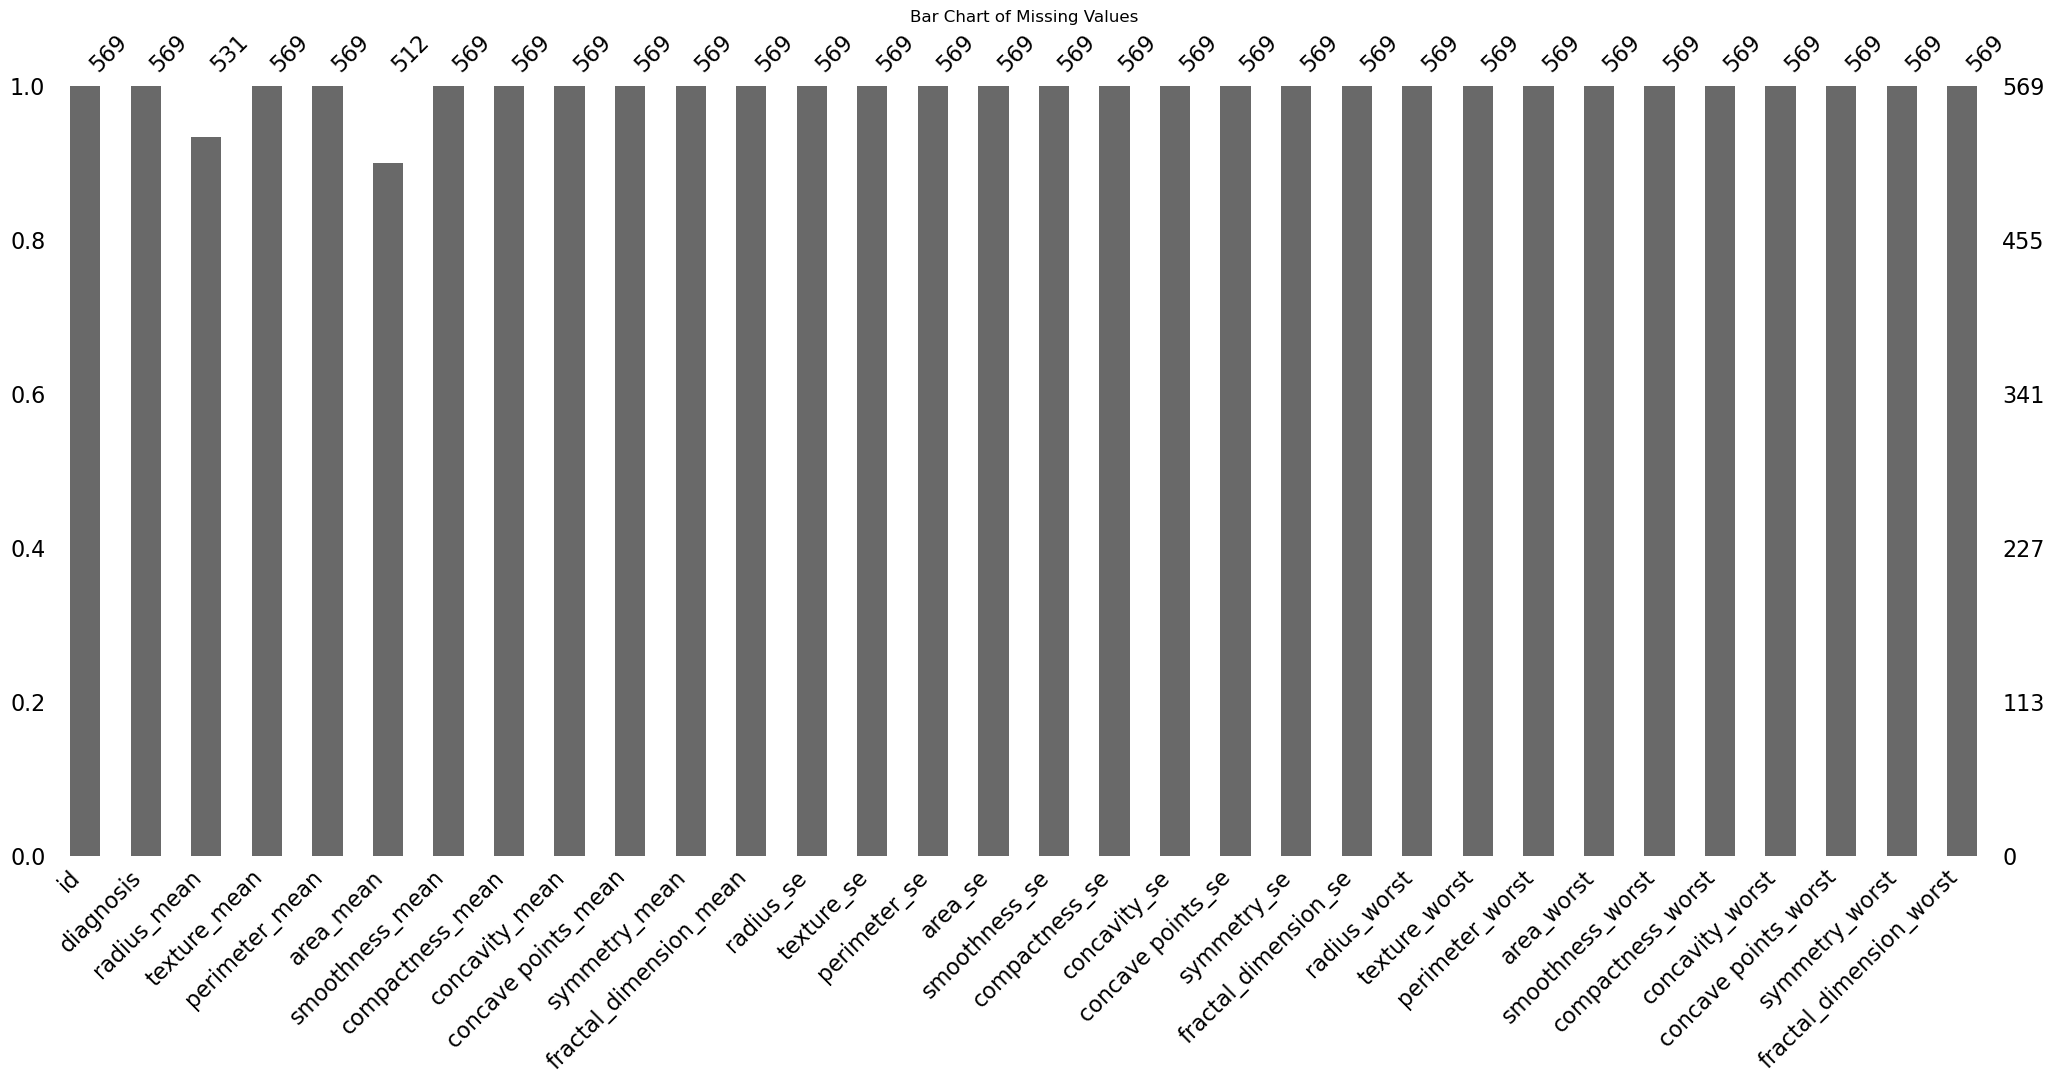

In [68]:
# Visualizing missing values using bar chart
msno.bar(breast_cancer_missing)
plt.title('Bar Chart of Missing Values')
plt.show()

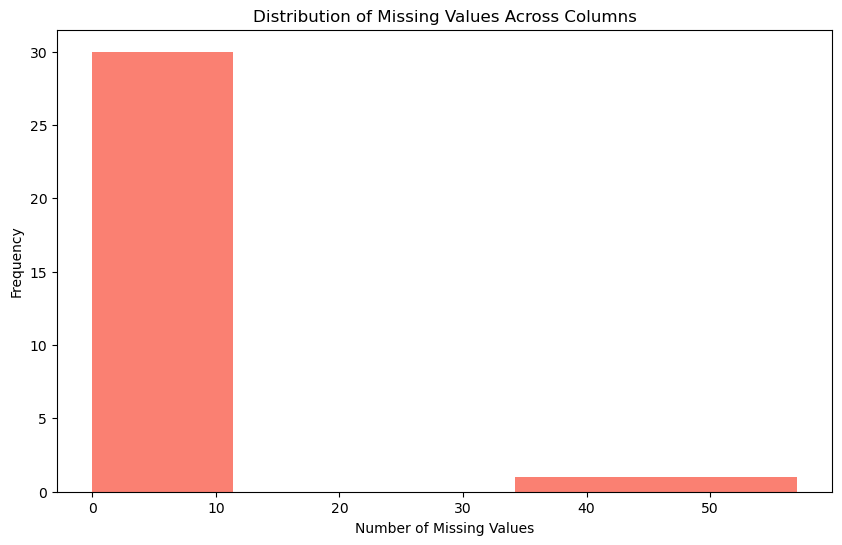

In [70]:
# Visualize missing values using histogram
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='hist', color='salmon', bins=5)
plt.title('Distribution of Missing Values Across Columns')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')
plt.show()


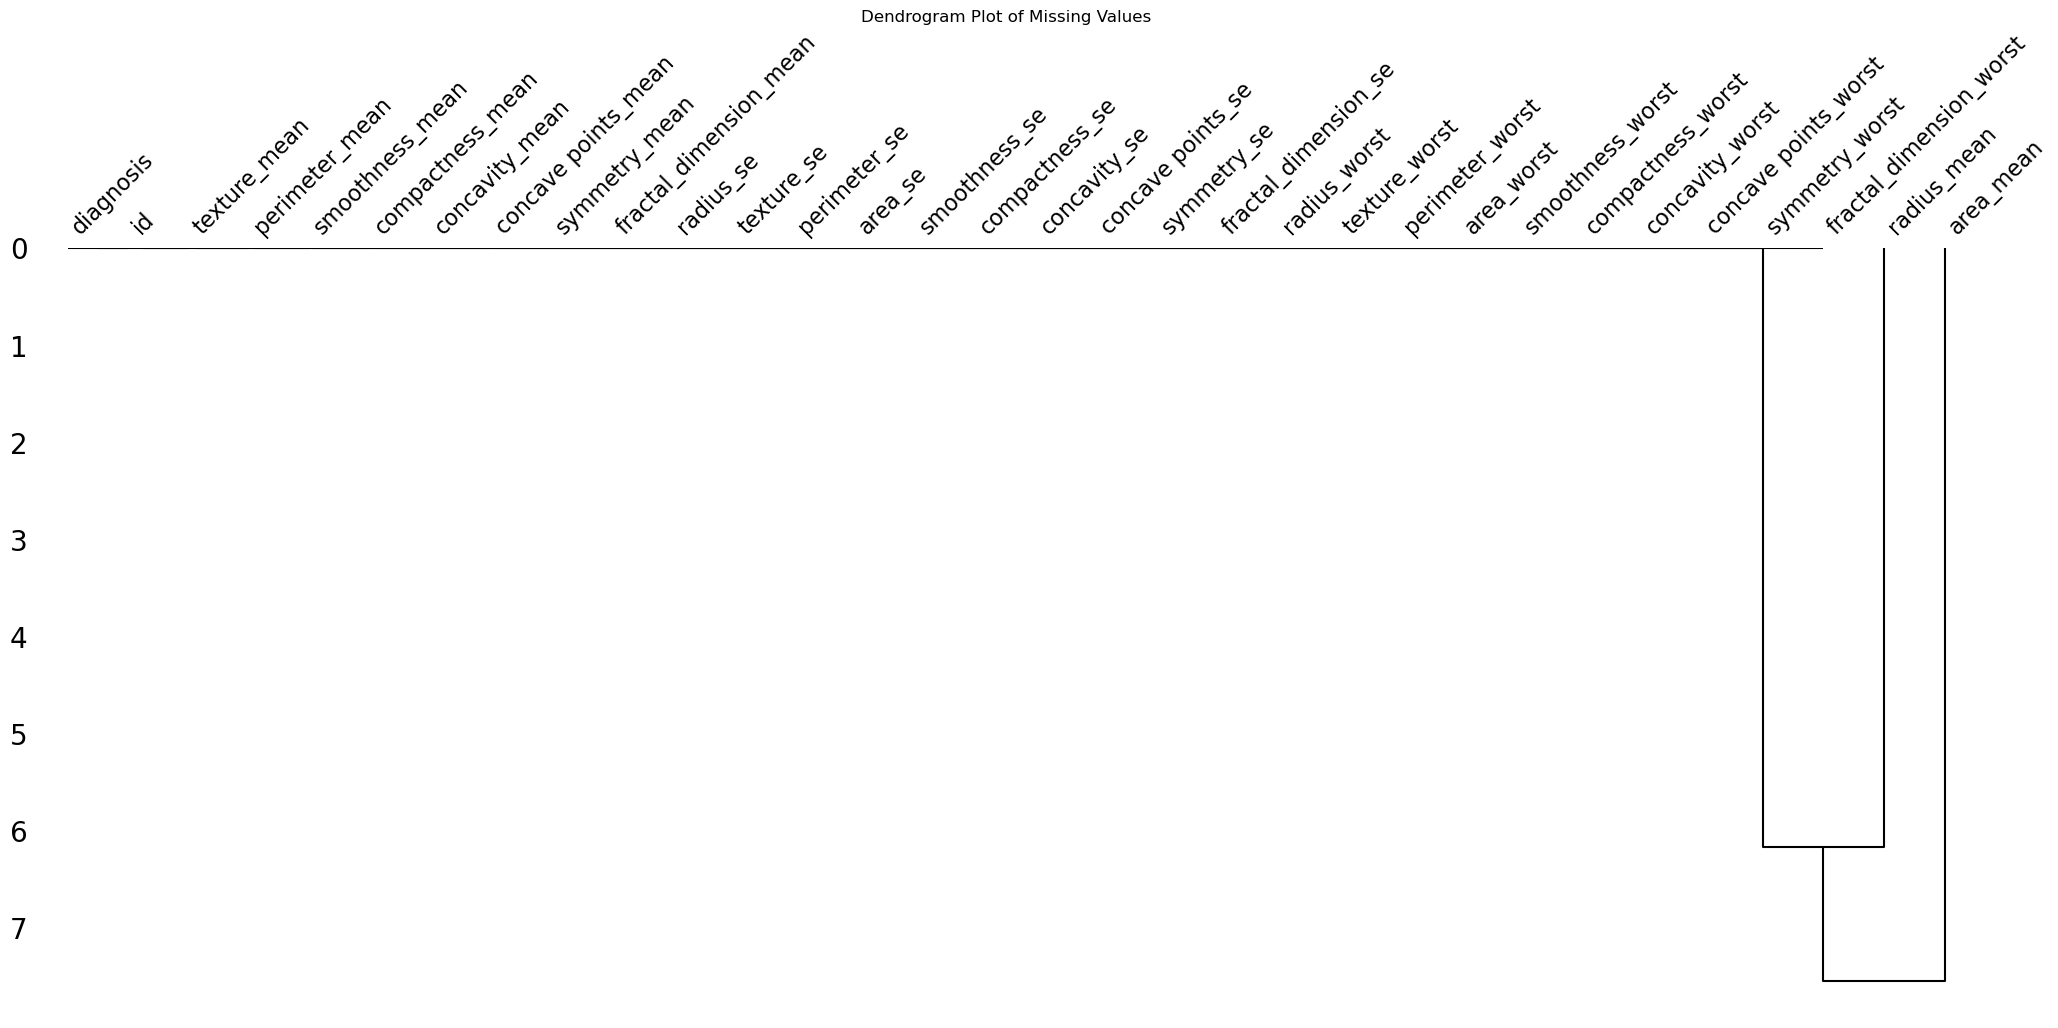

In [72]:
# Visualizing missing values using dendrogram plot
msno.dendrogram(breast_cancer_missing)
plt.title('Dendrogram Plot of Missing Values')
plt.show()

### Identifying and dealing with duplicate values

In [9]:
# Create a sample DataFrame with duplicate rows
data = {
    'A': [1, 2, 3, 4, 1, 2],
    'B': ['a', 'b', 'c', 'd', 'a', 'b'],
    'C': ['x', 'y', 'z', 'x', 'x', 'z']
}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

Original DataFrame:
   A  B  C
0  1  a  x
1  2  b  y
2  3  c  z
3  4  d  x
4  1  a  x
5  2  b  z


In [10]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame after removing duplicates
print("DataFrame after removing duplicates:")
print(df_no_duplicates)

DataFrame after removing duplicates:
   A  B  C
0  1  a  x
1  2  b  y
2  3  c  z
3  4  d  x
5  2  b  z


### Identifying Outliers

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

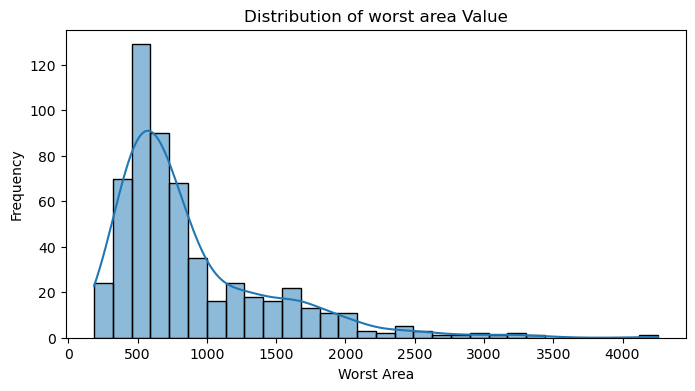

In [82]:
from sklearn.datasets import load_breast_cancer


# Load Breast Cancer dataset
breast_cancer = load_breast_cancer(as_frame=True)
data = breast_cancer.frame

# Display the first few rows of the dataset
print(data.head())

# Visualize distribution of target variable (median house value)
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='worst area', bins=30, kde=True)
plt.title('Distribution of worst area Value')
plt.xlabel('Worst Area')
plt.ylabel('Frequency')
plt.show()

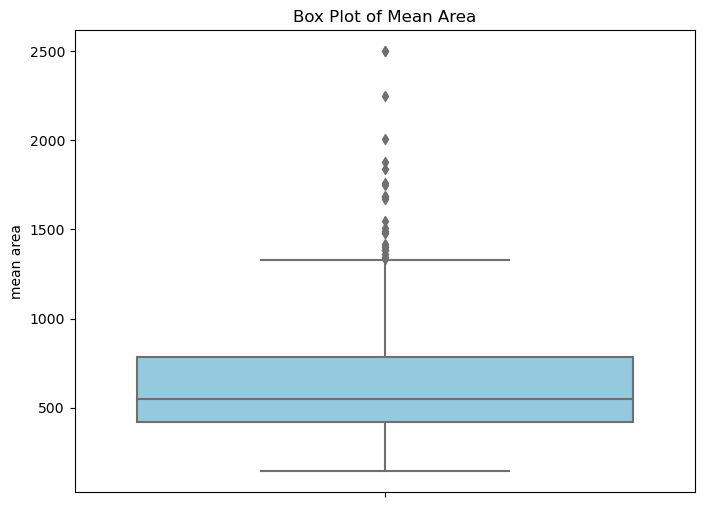

In [84]:
# Visualize outliers in a numerical feature (e.g., MedInc - median income)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='mean area', color='skyblue')
plt.title('Box Plot of Mean Area')
plt.ylabel('mean area')
plt.show()


#### Identifying Outliers with the z-score method

In [88]:
numerical_feature = 'mean symmetry'

# Calculate Z-scores for the selected feature
z_scores = (data[numerical_feature] - data[numerical_feature].mean()) / data[numerical_feature].std()

# Set threshold for outlier detection (e.g., Z-score greater than 3)
threshold = 1

# Identify outliers
outliers = data[np.abs(z_scores) > threshold]

# Display outliers
print("Outliers detected using Z-score method:")
print(outliers)

Outliers detected using Z-score method:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
3          11.42         20.38           77.58      386.1          0.14250   
5          12.45         15.70           82.57      477.1          0.12780   
7          13.71         20.83           90.20      577.9          0.11890   
8          13.00         21.82           87.50      519.8          0.12730   
..           ...           ...             ...        ...              ...   
560        14.05         27.15           91.38      600.4          0.09929   
561        11.20         29.37           70.67      386.0          0.07449   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.10990   
567        20.60         29.33          140.10     1265.0          0.11780   

     mean compactness  

In [90]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data[numerical_feature].quantile(0.25)
Q3 = data[numerical_feature].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1

# Identify outliers
outliers = data[(data[numerical_feature] < (Q1 - threshold * IQR)) | (data[numerical_feature] > (Q3 + threshold * IQR))]

# Display outliers
print("Outliers detected using IQR method:")
print(outliers)

Outliers detected using IQR method:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
3         11.420         20.38           77.58      386.1          0.14250   
8         13.000         21.82           87.50      519.8          0.12730   
12        19.170         24.80          132.40     1123.0          0.09740   
15        14.540         27.54           96.73      658.8          0.11390   
22        15.340         14.26          102.50      704.4          0.10730   
25        17.140         16.40          116.00      912.7          0.11860   
31        11.840         18.70           77.93      440.6          0.11090   
42        19.070         24.81          128.30     1104.0          0.09081   
60        10.170         14.88           64.55      311.9          0.11340   
63         9.173         13.86           59.20      260.9          0.07721   
76        13.530         10.

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [94]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [122]:
breast_cancer_missing.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malign,NaN,10.38,122.80,NaN,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,Malign,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,Malign,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,Malign,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,Malign,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
breast_cancer_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              531 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                512 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [126]:
breast_cancer_missing['diagnosis']=breast_cancer_missing['diagnosis'].astype(str)


In [132]:
breast_cancer_missing['diagnosis']

0      Malign
1      Malign
2      Malign
3      Malign
4      Malign
        ...  
564    Malign
565    Malign
566    Malign
567    Malign
568    Benign
Name: diagnosis, Length: 569, dtype: object

In [130]:
breast_cancer_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              531 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                512 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [106]:
diag_dict = {
    'M': 'Malign',
'B':'Benign'
}

In [110]:
breast_cancer_missing['diagnosis'] = breast_cancer_missing['diagnosis'].str.title().replace(diag_dict)

In [112]:
breast_cancer_missing.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malign,NaN,10.38,122.80,NaN,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,Malign,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,Malign,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,Malign,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,Malign,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
